In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

In [22]:
A = 0.025
cm = 10
rm = 1
E = -70
V = -65 
Vt = -67

Cm = cm*A
Rm = rm/A
Tau = Cm*Rm
Im = (V-E)/Rm
Vinf = E + Im*Rm
t = Tau * (np.log((E-Vinf)/(Vt-Vinf)))

print(Cm,Rm,Tau,Im,t)

0.25 40.0 10.0 0.125 9.162907318741551


1. 0.25 nF
2. 40.0 MΩ
3. 10 ms
4. 0.125 nA
5. 9.16 ms

# Problem 2

(array([-65.        , -64.98001   , -64.96003997, ..., -59.99523184,
       -59.98024411, -59.96527135]), 0.07)


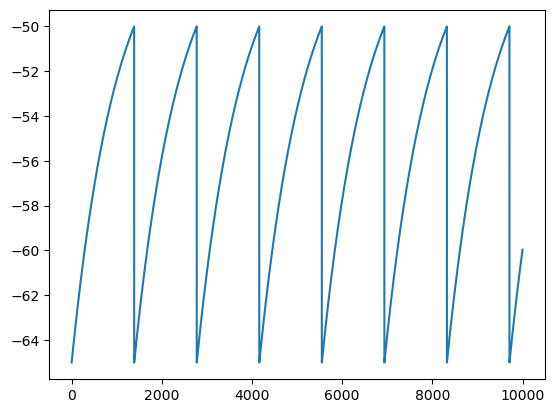

In [39]:
def int_fire (I):
    #Model Variables
    Vr = -65 #Voltage rest
    Vth = -50 #Voltage threshold
    Rm = 10 #Membrane Resistance
    Vinf = (Vr + I*Rm)
    V = np.zeros(10000)
    #timing
    tau = 10 #time constant
    dt = 0.01 #integration time step
    T = 10000 #simulation duration
    V[0] = Vr
    spike = 0
    for i in range(1,T):
        V[i] = Vinf + (V[i-1] - Vinf)*np.exp(-dt/tau)
        if V[i] > Vth:
            V[i] = Vr
            spike = spike + 1
    return V, spike/(dt*T)        
print(int_fire(2))
plt.plot(int_fire(2)[0])



In [35]:
#analytical formula
def ana (I):
    #Model Variables
    Vr = -65 #Voltage rest
    Vrst = Vr
    Vth = -50 #Voltage threshold
    Rm = 10 #Membrane Resistance
    Vinf = (Vr + I*Rm)
    V = np.zeros(10000)
    #timing
    tau = 10 #time constant
    dt = 0.01 #integration time step
    T = 10000 #simulation duration
    V[0] = Vr
    r = (tau * np.log((Rm*I+Vrst-Vr)/(Rm*I+Vrst-Vth)))**-1
    return r

print(ana(2))

0.07213475204444816


# Problem 3